In [5]:
from keras.datasets import imdb


Using TensorFlow backend.


In [6]:
vocabulary_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)
print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))

Loaded dataset with 25000 training samples, 25000 test samples


In [7]:
print('---review---')
print(X_train[6])
print('---label---')
print(y_train[6])

---review---
[1, 2, 365, 1234, 5, 1156, 354, 11, 14, 2, 2, 7, 1016, 2, 2, 356, 44, 4, 1349, 500, 746, 5, 200, 4, 4132, 11, 2, 2, 1117, 1831, 2, 5, 4831, 26, 6, 2, 4183, 17, 369, 37, 215, 1345, 143, 2, 5, 1838, 8, 1974, 15, 36, 119, 257, 85, 52, 486, 9, 6, 2, 2, 63, 271, 6, 196, 96, 949, 4121, 4, 2, 7, 4, 2212, 2436, 819, 63, 47, 77, 2, 180, 6, 227, 11, 94, 2494, 2, 13, 423, 4, 168, 7, 4, 22, 5, 89, 665, 71, 270, 56, 5, 13, 197, 12, 161, 2, 99, 76, 23, 2, 7, 419, 665, 40, 91, 85, 108, 7, 4, 2084, 5, 4773, 81, 55, 52, 1901]
---label---
1


In [8]:
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in X_train[6]])
print('---label---')
print(y_train[6])


---review with words---
['the', 'and', 'full', 'involving', 'to', 'impressive', 'boring', 'this', 'as', 'and', 'and', 'br', 'villain', 'and', 'and', 'need', 'has', 'of', 'costumes', 'b', 'message', 'to', 'may', 'of', 'props', 'this', 'and', 'and', 'concept', 'issue', 'and', 'to', "god's", 'he', 'is', 'and', 'unfolds', 'movie', 'women', 'like', "isn't", 'surely', "i'm", 'and', 'to', 'toward', 'in', "here's", 'for', 'from', 'did', 'having', 'because', 'very', 'quality', 'it', 'is', 'and', 'and', 'really', 'book', 'is', 'both', 'too', 'worked', 'carl', 'of', 'and', 'br', 'of', 'reviewer', 'closer', 'figure', 'really', 'there', 'will', 'and', 'things', 'is', 'far', 'this', 'make', 'mistakes', 'and', 'was', "couldn't", 'of', 'few', 'br', 'of', 'you', 'to', "don't", 'female', 'than', 'place', 'she', 'to', 'was', 'between', 'that', 'nothing', 'and', 'movies', 'get', 'are', 'and', 'br', 'yes', 'female', 'just', 'its', 'because', 'many', 'br', 'of', 'overly', 'to', 'descent', 'people', 'time', 

In [9]:
print('Maximum review length: {}'.format(
len(max((X_train + X_test), key=len))))


Maximum review length: 2697


In [10]:
print('Minimum review length: {}'.format(
len(min((X_test + X_test), key=len))))

Minimum review length: 14


In [11]:
from keras.preprocessing import sequence
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [12]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
embedding_size=32
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())



Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])


In [14]:
batch_size = 64
num_epochs = 3
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)


Instructions for updating:
Use tf.cast instead.
Train on 24936 samples, validate on 64 samples
Epoch 1/3
24936/24936 [==============================] - 203s 8ms/step - loss: 0.4311 - acc: 0.7949 - val_loss: 0.2357 - val_acc: 0.8750
Epoch 2/3
24936/24936 [==============================] - 206s 8ms/step - loss: 0.2754 - acc: 0.8903 - val_loss: 0.2184 - val_acc: 0.9375
Epoch 3/3
24936/24936 [==============================] - 202s 8ms/step - loss: 0.2433 - acc: 0.9044 - val_loss: 0.2337 - val_acc: 0.8906


In [15]:
import pandas as pd
import numpy as np
import json
import itertools
from keras.preprocessing import text, sequence
from keras import utils
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [16]:
df=pd.read_json("Team12_Chevron.json")

In [17]:
df.head(5)

,text,sentiment
1,Good morning. My name is Jonathan and I will b...,neutral
10,"Thanks Mike. Turning to Slide 5, an overview o...",neutral
100,"And so, there are times when we can fall in lo...",negative
101,Our next question comes from the line of Sam M...,neutral
102,"Mike, I'm going to try to not ask you to say t...",neutral


In [18]:
df['sentiment'].value_counts()

neutral     54
positive    45
negative    29
Name: sentiment, dtype: int64

In [19]:
newdf= df[df.sentiment != 'neutral']
newdf['sentiment'].value_counts()

positive    45
negative    29
Name: sentiment, dtype: int64

In [20]:
test_size = int(len(newdf) * 1)
print ("Test size: %d" % test_size)



Test size: 74


In [21]:
test_posts = newdf['text'][:test_size]
test_tags = newdf['sentiment'][:test_size]

In [22]:
max_words = 500
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [23]:
tokenize.fit_on_texts(test_posts) # only fit on train
x_test = tokenize.texts_to_matrix(test_posts)


In [24]:
# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(test_tags)
y_test = encoder.transform(test_tags)


In [25]:
# Inspect the dimenstions of our training and test data (this is helpful to debug)
print('x_test shape:', x_test.shape)

print('y_test shape:', y_test.shape)

x_test shape: (74, 500)
y_test shape: (74,)


In [26]:
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', scores[1])


Test accuracy: 0.6216216224270898


In [27]:
y_pred=model.predict(x_test)
y_pred

array([[0.5704363 ],
       [0.5704738 ],
       [0.57008386],
       [0.570457  ],
       [0.56967336],
       [0.56958556],
       [0.56990683],
       [0.56863385],
       [0.5656692 ],
       [0.5623235 ],
       [0.5641656 ],
       [0.55585283],
       [0.5150471 ],
       [0.48971114],
       [0.51142067],
       [0.53023803],
       [0.5193086 ],
       [0.57054824],
       [0.57054865],
       [0.5705485 ],
       [0.57054865],
       [0.5705481 ],
       [0.5705476 ],
       [0.57054794],
       [0.57054836],
       [0.5677652 ],
       [0.5191961 ],
       [0.569664  ],
       [0.5653488 ],
       [0.5704218 ],
       [0.5705478 ],
       [0.57054603],
       [0.5704057 ],
       [0.568188  ],
       [0.5705488 ],
       [0.56168956],
       [0.545333  ],
       [0.570546  ],
       [0.5705472 ],
       [0.56620353],
       [0.5705444 ],
       [0.55654854],
       [0.5669496 ],
       [0.5705481 ],
       [0.5705487 ],
       [0.5705402 ],
       [0.54950684],
       [0.569

In [28]:
text_labels = encoder.classes_ 

for i in range(10):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    print(test_posts.iloc[i][:50], "...")
    print('Actual label:' + test_tags.iloc[i])
    print("Predicted label: " + predicted_label + "\n")

And so, there are times when we can fall in love w ...
Actual label:negative
Predicted label: negative

So I think the increase performance of the Permian ...
Actual label:positive
Predicted label: negative

And we have increased the dividend that Pat has al ...
Actual label:positive
Predicted label: negative

Okay. And just on a related note; I guess this one ...
Actual label:negative
Predicted label: negative

Sam, we don’t have a target leverage rate, we thin ...
Actual label:negative
Predicted label: negative

So, I think that’s really what we are trying to -- ...
Actual label:positive
Predicted label: negative

For the full year earnings excluding special items ...
Actual label:positive
Predicted label: negative

We’re still very positive on the petrochemical inv ...
Actual label:negative
Predicted label: negative

And Mike, we always appreciate you getting on thes ...
Actual label:negative
Predicted label: negative

So it's not something that I can project with any  ...
Actual la

In [29]:

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

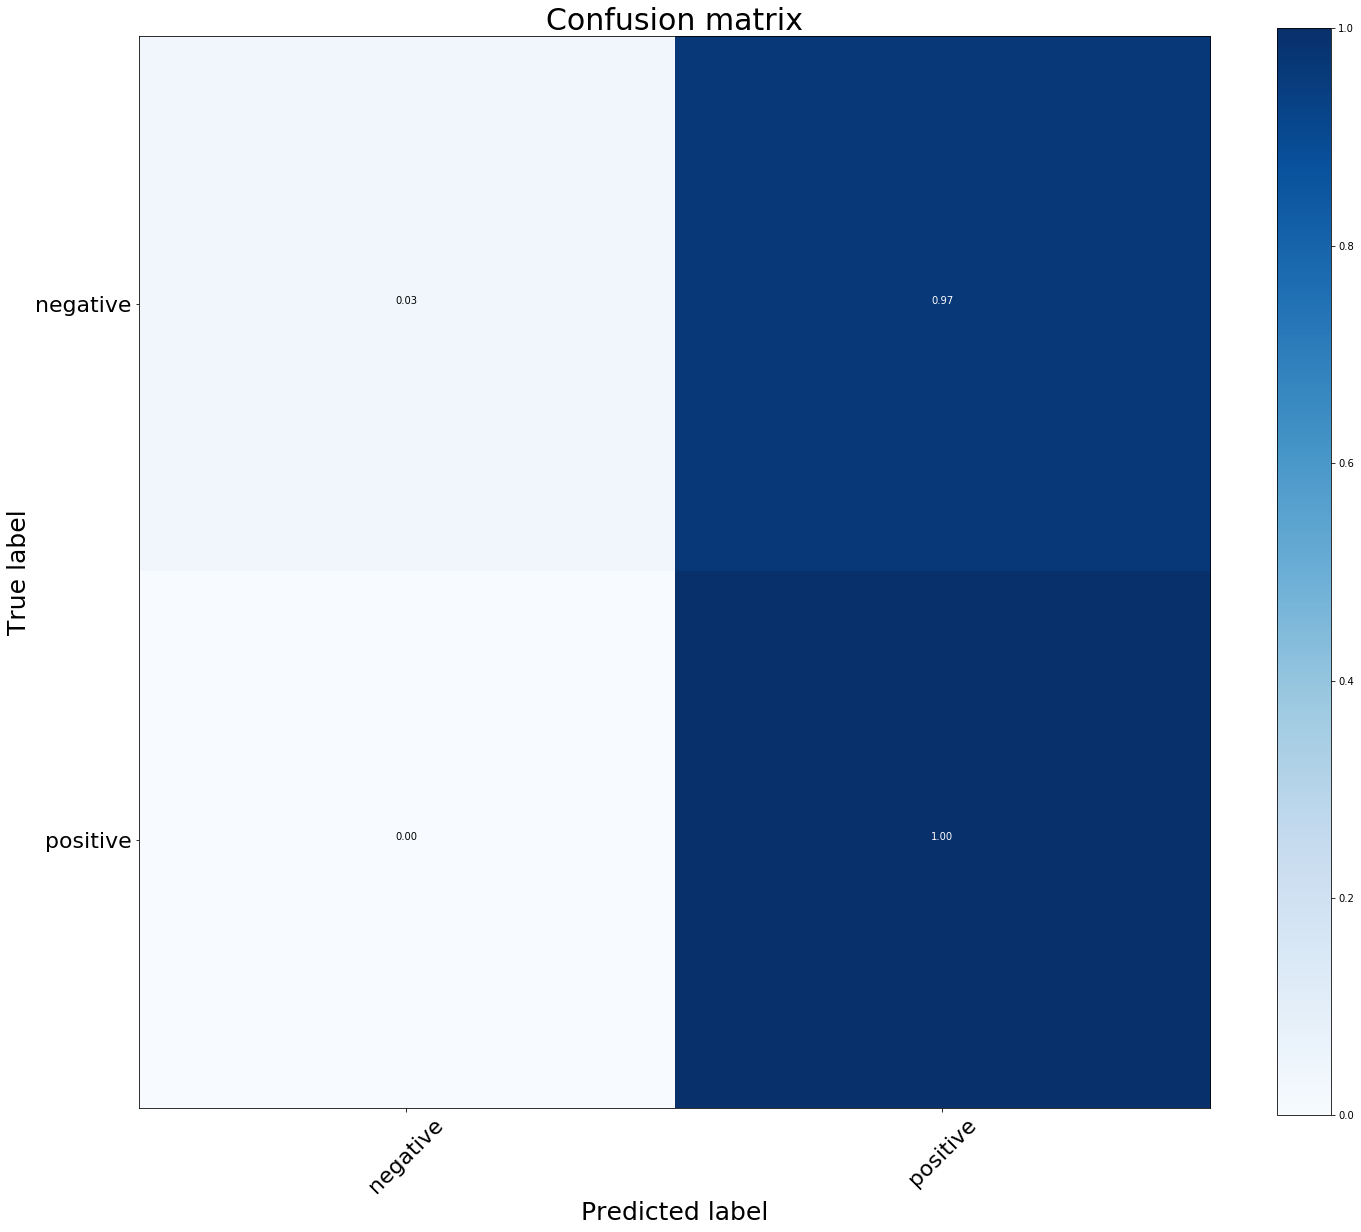

In [30]:
cnf_matrix = confusion_matrix(y_test,y_pred.round())
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()